# Cupy vs Numpy
В данном ноутбуке я буду проводить сравнения скорости выполнения различных задач в двух данных библиотеках



## Введение в cupy

По своей сути библиотека хочет сделать вычисления на GPU максимально приближенными к таковым на CPU.

Основным объектом является cp.array -- массив, расположенный на GPU и хранящий какие-то данные.

In [2]:
import numpy as np
import cupy as cp

x_gpu = cp.array([1, 2, 3])
print(x_gpu)

print(cp.square(x_gpu))

[1 2 3]
[1 4 9]


Большое количество функций даже называются одинаково:


### Сравнение функций NumPy и CuPy

| Категория | NumPy | CuPy |
|-----------|-------|------|
| **Создание массивов** | | |
| Массив из списка | `np.array([1,2,3])` | `cp.array([1,2,3])` |
| Нули | `np.zeros((3,3))` | `cp.zeros((3,3))` |
| Единицы | `np.ones((3,3))` | `cp.ones((3,3))` |
| Единичная матрица | `np.eye(3)` | `cp.eye(3)` |
| Диапазон | `np.arange(10)` | `cp.arange(10)` |
| Линейное пространство | `np.linspace(0,1,100)` | `cp.linspace(0,1,100)` |
| Случайные числа | `np.random.rand(3,3)` | `cp.random.rand(3,3)` |
| Пустой массив | `np.empty((3,3))` | `cp.empty((3,3))` |
| Заполнение значением | `np.full((3,3), 5)` | `cp.full((3,3), 5)` |
| **Математические операции** | | |
| Сложение | `np.add(a, b)` | `cp.add(a, b)` |
| Вычитание | `np.subtract(a, b)` | `cp.subtract(a, b)` |
| Умножение | `np.multiply(a, b)` | `cp.multiply(a, b)` |
| Деление | `np.divide(a, b)` | `cp.divide(a, b)` |
| Степень | `np.power(a, 2)` | `cp.power(a, 2)` |
| Квадратный корень | `np.sqrt(a)` | `cp.sqrt(a)` |
| Экспонента | `np.exp(a)` | `cp.exp(a)` |
| Логарифм | `np.log(a)` | `cp.log(a)` |
| Синус | `np.sin(a)` | `cp.sin(a)` |
| Косинус | `np.cos(a)` | `cp.cos(a)` |
| Абсолютное значение | `np.abs(a)` | `cp.abs(a)` |
| **Линейная алгебра** | | |
| Матричное умножение | `np.dot(a, b)` | `cp.dot(a, b)` |
| Матричное умножение (@) | `a @ b` | `a @ b` |
| Транспонирование | `np.transpose(a)` | `cp.transpose(a)` |
| Определитель | `np.linalg.det(a)` | `cp.linalg.det(a)` |
| Обратная матрица | `np.linalg.inv(a)` | `cp.linalg.inv(a)` |
| **Статистика** | | |
| Сумма | `np.sum(a)` | `cp.sum(a)` |
| Среднее | `np.mean(a)` | `cp.mean(a)` |
| Медиана | `np.median(a)` | `cp.median(a)` |
| Стандартное отклонение | `np.std(a)` | `cp.std(a)` |
| Дисперсия | `np.var(a)` | `cp.var(a)` |
| Минимум | `np.min(a)` | `cp.min(a)` |
| Максимум | `np.max(a)` | `cp.max(a)` |
| **Манипуляции с формой** | | |
| Изменение формы | `np.reshape(a, (2,3))` | `cp.reshape(a, (2,3))` |
| Выравнивание | `np.flatten(a)` | `cp.flatten(a)` |
| Конкатенация | `np.concatenate([a,b])` | `cp.concatenate([a,b])` |
| Разделение | `np.split(a, 3)` | `cp.split(a, 3)` |
| **Логические операции** | | |
| Больше | `np.greater(a, b)` | `cp.greater(a, b)` |
| Меньше | `np.less(a, b)` | `cp.less(a, b)` |
| Равно | `np.equal(a, b)` | `cp.equal(a, b)` |
| Логическое И | `np.logical_and(a, b)` | `cp.logical_and(a, b)` |
| Логическое ИЛИ | `np.logical_or(a, b)` | `cp.logical_or(a, b)` |
| Where | `np.where(cond, x, y)` | `cp.where(cond, x, y)` |


### Примеры использования

In [3]:
# Создание массивов
np_arr = np.arange(1000000)
cp_arr = cp.arange(1000000)

print('NumPy:', np_arr[:5])
print('CuPy:', cp_arr[:5])

NumPy: [0 1 2 3 4]
CuPy: [0 1 2 3 4]


In [4]:
# Математические операции
np_x = np.linspace(0, 2*np.pi, 1000000)
cp_x = cp.linspace(0, 2*cp.pi, 1000000)

print('NumPy sin:')
%timeit np.sin(np_x)

print('CuPy sin:')
%timeit cp.sin(cp_x); cp.cuda.Stream.null.synchronize()

NumPy sin:
11.9 ms ± 543 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
CuPy sin:
188 µs ± 4.67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
# Матричное умножение
n = 2048
np_a = np.random.rand(n, n).astype(np.float32)
np_b = np.random.rand(n, n).astype(np.float32)

cp_a = cp.random.rand(n, n, dtype=cp.float32)
cp_b = cp.random.rand(n, n, dtype=cp.float32)

print('NumPy matmul:')
%timeit np.dot(np_a, np_b)

print('CuPy matmul:')
%timeit cp.dot(cp_a, cp_b); cp.cuda.Stream.null.synchronize()

NumPy matmul:
165 ms ± 34.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
CuPy matmul:
6.15 ms ± 41.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
# Статистические операции
np_data = np.random.randn(10000000)
cp_data = cp.random.randn(10000000)

print('NumPy stats:')
%timeit np.mean(np_data), np.std(np_data), np.max(np_data)

print('CuPy stats:')
%timeit cp.mean(cp_data), cp.std(cp_data), cp.max(cp_data); cp.cuda.Stream.null.synchronize()

NumPy stats:
54.4 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
CuPy stats:
19.5 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
# Сортировка
np_unsorted = np.random.rand(5000000)
cp_unsorted = cp.random.rand(5000000)

print('NumPy sort:')
%timeit np.sort(np_unsorted)

print('CuPy sort:')
%timeit cp.sort(cp_unsorted); cp.cuda.Stream.null.synchronize()

NumPy sort:
71.7 ms ± 11.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
CuPy sort:
4.51 ms ± 72.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Мы можем использовать несколько устройств с помощью cupy.Device() и контекстного мэнеджера.

### Особенности работы с памятью
Так как все операции производятся с массивами, расположенными в видеопамяти, то нам нужно по-особому с ними обращаться.

Для того, чтобы создать массив напрямую на GPU можно использовать функции, близкие к таковым в numpy

In [8]:
gpu_array = cp.zeros((1000, 1000), dtype=cp.float32)
print(f'Массив на GPU: {gpu_array.device}')

Массив на GPU: <CUDA Device 0>


Для переноса на GPU используем функцию cp.asarray

In [9]:
cpu_array = np.ones((1000, 1000), dtype=np.float32)
gpu_from_cpu = cp.asarray(cpu_array)

Наоборот cp.asnumpy или cp.array.get

In [10]:
back_to_cpu = cp.asnumpy(gpu_from_cpu)

Так же можно получать статистику по использованию памяти:
cupy.cuda.MemoryPool
- free_all_blocks() -- очистка пула
- free_bytes() -- пустое пространство
- malloc(size) -- выделить память в пуле
- set_limit() -- задать новое ограничение на размер
- get_limit() -- получить текущее ограничение на размер пула
- total_bytes() -- всего свободных байтов
- used_bytes() -- использующиеся байты

In [ ]:
def get_info(mp):
  print("used_bytes:", mp.used_bytes())
  print("free_bytes:", mp.free_bytes())
  print("total_bytes:", mp.total_bytes())
  print("get_limit:", mp.get_limit())
  print()


mp = cp.get_default_memory_pool()
get_info(mp)

mp.set_limit(size=512 * 1024**2)
ptr = mp.malloc(64 * 1024**2)
get_info(mp)

del ptr
cp.cuda.runtime.deviceSynchronize()
get_info(mp)

x = cp.empty((32 * 1024 * 1024,), dtype=cp.float32)
cp.cuda.runtime.deviceSynchronize()
get_info(mp)

del x
cp.cuda.runtime.deviceSynchronize()
get_info(mp)

mp.free_all_blocks()
cp.cuda.runtime.deviceSynchronize()
get_info(mp)

mp.set_limit(size=0)
print("get_limit:", mp.get_limit())

used_bytes: 177555456
free_bytes: 98612736
total_bytes: 276168192
get_limit: 0

used_bytes: 244664320
free_bytes: 98612736
total_bytes: 343277056
get_limit: 536870912

used_bytes: 177555456
free_bytes: 165721600
total_bytes: 343277056
get_limit: 536870912

used_bytes: 311773184
free_bytes: 165721600
total_bytes: 477494784
get_limit: 536870912

used_bytes: 177555456
free_bytes: 299939328
total_bytes: 477494784
get_limit: 536870912

used_bytes: 177555456
free_bytes: 16776704
total_bytes: 194332160
get_limit: 536870912

get_limit: 0


# Cupy vs Numpy
В данном ноутбуке я буду проводить сравнения скорости выполнения различных задач в двух данных библиотеках



## Введение в cupy

По своей сути библиотека хочет сделать вычисления на GPU максимально приближенными к таковым на CPU.

Основным объектом является cp.array -- массив, расположенный на GPU и хранящий какие-то данные.

In [12]:
import numpy as np
import cupy as cp

x_gpu = cp.array([1, 2, 3])
print(x_gpu)

print(cp.square(x_gpu))

[1 2 3]
[1 4 9]


Большое количество функций даже называются одинаково:


### Сравнение функций NumPy и CuPy

| Категория | NumPy | CuPy |
|-----------|-------|------|
| **Создание массивов** | | |
| Массив из списка | `np.array([1,2,3])` | `cp.array([1,2,3])` |
| Нули | `np.zeros((3,3))` | `cp.zeros((3,3))` |
| Единицы | `np.ones((3,3))` | `cp.ones((3,3))` |
| Единичная матрица | `np.eye(3)` | `cp.eye(3)` |
| Диапазон | `np.arange(10)` | `cp.arange(10)` |
| Линейное пространство | `np.linspace(0,1,100)` | `cp.linspace(0,1,100)` |
| Случайные числа | `np.random.rand(3,3)` | `cp.random.rand(3,3)` |
| Пустой массив | `np.empty((3,3))` | `cp.empty((3,3))` |
| Заполнение значением | `np.full((3,3), 5)` | `cp.full((3,3), 5)` |
| **Математические операции** | | |
| Сложение | `np.add(a, b)` | `cp.add(a, b)` |
| Вычитание | `np.subtract(a, b)` | `cp.subtract(a, b)` |
| Умножение | `np.multiply(a, b)` | `cp.multiply(a, b)` |
| Деление | `np.divide(a, b)` | `cp.divide(a, b)` |
| Степень | `np.power(a, 2)` | `cp.power(a, 2)` |
| Квадратный корень | `np.sqrt(a)` | `cp.sqrt(a)` |
| Экспонента | `np.exp(a)` | `cp.exp(a)` |
| Логарифм | `np.log(a)` | `cp.log(a)` |
| Синус | `np.sin(a)` | `cp.sin(a)` |
| Косинус | `np.cos(a)` | `cp.cos(a)` |
| Абсолютное значение | `np.abs(a)` | `cp.abs(a)` |
| **Линейная алгебра** | | |
| Матричное умножение | `np.dot(a, b)` | `cp.dot(a, b)` |
| Матричное умножение (@) | `a @ b` | `a @ b` |
| Транспонирование | `np.transpose(a)` | `cp.transpose(a)` |
| Определитель | `np.linalg.det(a)` | `cp.linalg.det(a)` |
| Обратная матрица | `np.linalg.inv(a)` | `cp.linalg.inv(a)` |
| **Статистика** | | |
| Сумма | `np.sum(a)` | `cp.sum(a)` |
| Среднее | `np.mean(a)` | `cp.mean(a)` |
| Медиана | `np.median(a)` | `cp.median(a)` |
| Стандартное отклонение | `np.std(a)` | `cp.std(a)` |
| Дисперсия | `np.var(a)` | `cp.var(a)` |
| Минимум | `np.min(a)` | `cp.min(a)` |
| Максимум | `np.max(a)` | `cp.max(a)` |
| **Манипуляции с формой** | | |
| Изменение формы | `np.reshape(a, (2,3))` | `cp.reshape(a, (2,3))` |
| Выравнивание | `np.flatten(a)` | `cp.flatten(a)` |
| Конкатенация | `np.concatenate([a,b])` | `cp.concatenate([a,b])` |
| Разделение | `np.split(a, 3)` | `cp.split(a, 3)` |
| **Логические операции** | | |
| Больше | `np.greater(a, b)` | `cp.greater(a, b)` |
| Меньше | `np.less(a, b)` | `cp.less(a, b)` |
| Равно | `np.equal(a, b)` | `cp.equal(a, b)` |
| Логическое И | `np.logical_and(a, b)` | `cp.logical_and(a, b)` |
| Логическое ИЛИ | `np.logical_or(a, b)` | `cp.logical_or(a, b)` |
| Where | `np.where(cond, x, y)` | `cp.where(cond, x, y)` |


### Примеры использования

In [13]:
# Создание массивов
np_arr = np.arange(1000000)
cp_arr = cp.arange(1000000)

print('NumPy:', np_arr[:5])
print('CuPy:', cp_arr[:5])

NumPy: [0 1 2 3 4]
CuPy: [0 1 2 3 4]


In [14]:
# Математические операции
np_x = np.linspace(0, 2*np.pi, 1000000)
cp_x = cp.linspace(0, 2*cp.pi, 1000000)

print('NumPy sin:')
%timeit np.sin(np_x)

print('CuPy sin:')
%timeit cp.sin(cp_x); cp.cuda.Stream.null.synchronize()

NumPy sin:
12.9 ms ± 2.04 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
CuPy sin:
183 µs ± 4.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
# Матричное умножение
n = 2048
np_a = np.random.rand(n, n).astype(np.float32)
np_b = np.random.rand(n, n).astype(np.float32)

cp_a = cp.random.rand(n, n, dtype=cp.float32)
cp_b = cp.random.rand(n, n, dtype=cp.float32)

print('NumPy matmul:')
%timeit np.dot(np_a, np_b)

print('CuPy matmul:')
%timeit cp.dot(cp_a, cp_b); cp.cuda.Stream.null.synchronize()

NumPy matmul:
165 ms ± 31.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
CuPy matmul:
4.24 ms ± 93.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
# Статистические операции
np_data = np.random.randn(10000000)
cp_data = cp.random.randn(10000000)

print('NumPy stats:')
%timeit np.mean(np_data), np.std(np_data), np.max(np_data)

print('CuPy stats:')
%timeit cp.mean(cp_data), cp.std(cp_data), cp.max(cp_data); cp.cuda.Stream.null.synchronize()

NumPy stats:
56 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
CuPy stats:
8.43 ms ± 1.08 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
# Сортировка
np_unsorted = np.random.rand(5000000)
cp_unsorted = cp.random.rand(5000000)

print('NumPy sort:')
%timeit np.sort(np_unsorted)

print('CuPy sort:')
%timeit cp.sort(cp_unsorted); cp.cuda.Stream.null.synchronize()

NumPy sort:
69.2 ms ± 7.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
CuPy sort:
4.63 ms ± 82.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Мы можем использовать несколько устройств с помощью cupy.Device() и контекстного мэнеджера.

### Особенности работы с памятью
Так как все операции производятся с массивами, расположенными в видеопамяти, то нам нужно по-особому с ними обращаться.

Для того, чтобы создать массив напрямую на GPU можно использовать функции, близкие к таковым в numpy

In [18]:
gpu_array = cp.zeros((1000, 1000), dtype=cp.float32)
print(f'Массив на GPU: {gpu_array.device}')

Массив на GPU: <CUDA Device 0>


Для переноса на GPU используем функцию cp.asarray

In [19]:
cpu_array = np.ones((1000, 1000), dtype=np.float32)
gpu_from_cpu = cp.asarray(cpu_array)

Наоборот cp.asnumpy или cp.array.get

In [20]:
back_to_cpu = cp.asnumpy(gpu_from_cpu)

## Custom Kernels
Иногда встроенных функций CuPy недостаточно для решения специфичных задач. В таких случаях можно написать собственные ядра.

CuPy предоставляет несколько способов создания кастомных ядер:

### ElementwiseKernel

```python
class cupy.ElementwiseKernel(in_params, out_params, operation, name='kernel', reduce_dims=True, preamble='', no_return=False, return_tuple=False, **kwargs)
```
весь код в kernel мы пишем на CUDA-C/C++. Поэтому код довольно знаком(используем стандартные для С типы и т.п.)
- in_params
- out_params

- operation - пишем сам код функции без объявления(его мы уже провели в Kernel) возвращаемые значения присваиваем в out_param

- preamble - можем использовать для каких-то вспомогательных функций(этот код вставят перед объявлением основной функции)

Используется для поэлементных операций над массивами. Автоматически распараллеливает вычисления.

In [21]:
# Простая поэлементная операция
multiply_add = cp.ElementwiseKernel(
    'float32 x, float32 y, float32 z',  # входные параметры
    'float32 out',                       # выходной параметр
    '''
    out = x * y + z
    ''',                   # операция
    'multiply_add'                       # имя ядра
)

x = cp.random.rand(1000000, dtype=cp.float32)
y = cp.random.rand(1000000, dtype=cp.float32)
z = cp.random.rand(1000000, dtype=cp.float32)

result = multiply_add(x, y, z)
print(result[:5])

[0.9969955  0.18284184 0.88655794 0.580814   0.09771548]


In [22]:
import cupy as cp

preamble = r'''
__device__ __forceinline__ float sqrf(float x) {
    return x * x;
}
'''

square = cp.ElementwiseKernel(
    in_params='float32 x, float32 lo, float32 hi',
    out_params='float32 y',
    operation=r'''
        y = sqrf(x);
    ''',
    name='clamp_square',
    preamble=preamble,
)

x = cp.array([-3, -1, 0.5, 2, 10], dtype=cp.float32)
y = square(x, cp.float32(-1.0), cp.float32(2.0))
print(y)  # [-1..2] -> square => [1, 1, 0.25, 4, 4]


[  9.     1.     0.25   4.   100.  ]


ElementwiseKernel автоматически обрабатывает индексацию и распределение работы по потокам GPU

То есть, если вы хотите использовать элемент массива x, то вы просто пишете x и всё работает. Обёртка сама вычисляет требуемое значение индекса.
Если же вы хотите использовать индексацию в ручном режиме, то перед объявлением массива нужно использовать ключевое слово raw. Затем индексацию проводить с учётом следующих особых переменных:
- i - показывает положение внутри цикла
- _ind.size() - всего элементов

In [23]:
clip_kernel = cp.ElementwiseKernel(
    'float32 x, float32 min_val, float32 max_val',
    'float32 out',
    '''
    if (x < min_val) {
        out = min_val;
    } else if (x > max_val) {
        out = max_val;
    } else {
        out = x;
    }
    ''',
    'clip_kernel'
)

x = cp.random.randn(1000000, dtype=cp.float32)
clipped = clip_kernel(x, -2.0, 2.0)

print(f'Min: {cp.min(clipped)}, Max: {cp.max(clipped)}')

Min: -2.0, Max: 2.0


### ReductionKernel
Используется для операций редукции (сумма, максимум, и т.д.). Эффективно объединяет элементы массива.

In [24]:
# сумма квадратов
sum_of_squares = cp.ReductionKernel(
    'float32 x',           # входной тип
    'float32 out',         # выходной тип
    'x * x',               # map: что делаем с каждым элементом
    'a + b',               # reduce: как объединяем результаты
    'out = a',             # постобработка
    '0',                   # начальное значение
    'sum_of_squares'       # имя
)

x = cp.arange(10, dtype=cp.float32)
result = sum_of_squares(x)

print(f'Сумма квадратов: {result}')
print(f'Проверка: {cp.sum(x**2)}')

Сумма квадратов: 285.0
Проверка: 285.0


ReductionKernel оптимизирован для параллельного объединения данных через дерево редукции

In [25]:
# Поиск максимального абсолютного значения
max_abs = cp.ReductionKernel(
    'float32 x',
    'float32 out',
    'abs(x)',              # берем абсолютное значение
    'max(a, b)',           # находим максимум
    'out = a',
    '0.0f',           # начальное значение для максимума
    'max_abs'
)

x = cp.random.randn(1000000, dtype=cp.float32)
result = max_abs(x)

print(f'Максимум по модулю: {result}')

Максимум по модулю: 4.983526706695557


### RawKernel
Для полного контроля над CUDA кодом. Позволяет писать низкоуровневые ядра с ручным управлением потоками.

In [26]:
add_kernel = cp.RawKernel(r'''
extern "C" __global__
void my_add(const float* x1, const float* x2, float* y) {
    int tid = blockDim.x * blockIdx.x + threadIdx.x;
    y[tid] = x1[tid] + x2[tid];
}
''', 'my_add')
x1 = cp.arange(25, dtype=cp.float32).reshape(5, 5)
x2 = cp.arange(25, dtype=cp.float32).reshape(5, 5)
y = cp.zeros((5, 5), dtype=cp.float32)
add_kernel((5,), (5,), (x1, x2, y))  # grid, block and arguments
y


array([[ 0.,  2.,  4.,  6.,  8.],
       [10., 12., 14., 16., 18.],
       [20., 22., 24., 26., 28.],
       [30., 32., 34., 36., 38.],
       [40., 42., 44., 46., 48.]], dtype=float32)

RawKernel дает полный контроль, но требует знания CUDA C++ и ручного управления индексами потоков

## Декораторы для оптимизации
CuPy предоставляет два основных декоратора: cp.fuse() и cupyx.jit.rawkernel()

### cp.fuse()
Объединяет несколько операций в одно ядро, уменьшая накладные расходы на запуск ядер и обращения к памяти.
Автоматически генерирует оптимизированный код.

In [27]:
# Без fuse - каждая операция запускает отдельное ядро
def compute_without_fuse(x, y, z):
    return (x * y + z) ** 2

# С fuse - все операции в одном ядре
@cp.fuse()
def compute_with_fuse(x, y, z):
    return (x * y + z) ** 2

x = cp.random.rand(1000000, dtype=cp.float32)
y = cp.random.rand(1000000, dtype=cp.float32)
z = cp.random.rand(1000000, dtype=cp.float32)

print('Без fuse:')
%timeit compute_without_fuse(x, y, z); cp.cuda.Stream.null.synchronize()

print('С fuse:')
%timeit compute_with_fuse(x, y, z); cp.cuda.Stream.null.synchronize()

Без fuse:
155 µs ± 2.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
С fuse:
84.3 µs ± 3.56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


cp.fuse() уменьшает количество обращений к глобальной памяти GPU, объединяя промежуточные результаты

### cupyx.jit.rawkernel()
Позволяет писать низкоуровневые CUDA ядра на Python с явным управлением индексами потоков.
Требует ручного управления

cupyx.jit.rawkernel() дает полный контроль над выполнением, но требует понимания CUDA модели потоков

### Сравнение производительности
Кастомные ядра могут быть быстрее встроенных функций для специфичных операций

In [28]:
n = 10000000
x = cp.random.rand(n, dtype=cp.float32)
y = cp.random.rand(n, dtype=cp.float32)
z = cp.random.rand(n, dtype=cp.float32)

print('Встроенные функции:')
%timeit x * y + z; cp.cuda.Stream.null.synchronize()

print('Кастомное ядро:')
%timeit multiply_add(x, y, z); cp.cuda.Stream.null.synchronize()

Встроенные функции:
946 µs ± 2.12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Кастомное ядро:
638 µs ± 9.86 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Сравнение производительности numpy и cupy

In [29]:
import matplotlib.pyplot as plt
import time

def benchmark(func, *args, warmup=3, iterations=10):
    for i in range(warmup):
        func(*args)
    if 'cupy' in str(type(args[0])):
        cp.cuda.Stream.null.synchronize()

    times = []
    start_gpu = cp.cuda.Event()
    end_gpu = cp.cuda.Event()
    for i in range(iterations):
        start = time.perf_counter()
        start_gpu.record()
        func(*args)
        if 'cupy' in str(type(args[0])):
            end_gpu.record()
            cp.cuda.Stream.null.synchronize()
            times.append(cp.cuda.get_elapsed_time(start_gpu, end_gpu) / 1000.0)
        else:
            times.append(time.perf_counter() - start)
    return np.mean(times)

### 1. Матричное умножение

In [30]:
sizes = [128, 256, 512, 1024, 2048, 4096]
numpy_matmul = []
cupy_matmul = []

for size in sizes:
    np_a = np.random.rand(size, size).astype(np.float32)
    np_b = np.random.rand(size, size).astype(np.float32)
    cp_a = cp.random.rand(size, size, dtype=cp.float32)
    cp_b = cp.random.rand(size, size, dtype=cp.float32)
    
    numpy_matmul.append(benchmark(np.dot, np_a, np_b))
    cupy_matmul.append(benchmark(cp.dot, cp_a, cp_b))
    print(f'{size}x{size}: NumPy={numpy_matmul[-1]:.4f}s, CuPy={cupy_matmul[-1]:.4f}s')

128x128: NumPy=0.0001s, CuPy=0.0001s
256x256: NumPy=0.0003s, CuPy=0.0001s
512x512: NumPy=0.0022s, CuPy=0.0001s
1024x1024: NumPy=0.0172s, CuPy=0.0004s
2048x2048: NumPy=0.1431s, CuPy=0.0060s
4096x4096: NumPy=1.1859s, CuPy=0.0334s


### 2. Элементные операции

In [31]:
data_sizes = [10**5, 10**6, 10**7, 10**8]
numpy_elem = []
cupy_elem = []

for size in data_sizes:
    np_x = np.random.rand(size).astype(np.float32)
    cp_x = cp.random.rand(size, dtype=cp.float32)
    
    numpy_elem.append(benchmark(lambda x: np.sin(x) + np.cos(x) * np.exp(x), np_x))
    cupy_elem.append(benchmark(lambda x: cp.sin(x) + cp.cos(x) * cp.exp(x), cp_x))
    print(f'{size:.0e}: NumPy={numpy_elem[-1]:.4f}s, CuPy={cupy_elem[-1]:.4f}s')

1e+05: NumPy=0.0003s, CuPy=0.0001s
1e+06: NumPy=0.0030s, CuPy=0.0002s
1e+07: NumPy=0.0561s, CuPy=0.0019s
1e+08: NumPy=0.6451s, CuPy=0.0204s


### 3. Статистические редукции

In [32]:
numpy_reduce = []
cupy_reduce = []

for size in data_sizes:
    np_x = np.random.rand(size).astype(np.float32)
    cp_x = cp.random.rand(size, dtype=cp.float32)
    
    numpy_reduce.append(benchmark(lambda x: (np.sum(x), np.mean(x), np.std(x)), np_x))
    cupy_reduce.append(benchmark(lambda x: (cp.sum(x), cp.mean(x), cp.std(x)), cp_x))
    print(f'{size:.0e}: NumPy={numpy_reduce[-1]:.4f}s, CuPy={cupy_reduce[-1]:.4f}s')

1e+05: NumPy=0.0002s, CuPy=0.0003s
1e+06: NumPy=0.0017s, CuPy=0.0006s
1e+07: NumPy=0.0222s, CuPy=0.0072s
1e+08: NumPy=0.3409s, CuPy=0.0707s


### 4. FFT

In [33]:
fft_sizes = [2**10, 2**12, 2**14, 2**16, 2**18, 2**20]
numpy_fft = []
cupy_fft = []

for size in fft_sizes:
    np_x = np.random.rand(size).astype(np.float64)
    cp_x = cp.random.rand(size, dtype=np.float64)
    
    numpy_fft.append(benchmark(np.fft.fft, np_x))
    cupy_fft.append(benchmark(cp.fft.fft, cp_x))
    print(f'2^{int(np.log2(size))}: NumPy={numpy_fft[-1]:.4f}s, CuPy={cupy_fft[-1]:.4f}s')

2^10: NumPy=0.0001s, CuPy=0.0001s
2^12: NumPy=0.0001s, CuPy=0.0001s
2^14: NumPy=0.0003s, CuPy=0.0001s
2^16: NumPy=0.0014s, CuPy=0.0001s
2^18: NumPy=0.0060s, CuPy=0.0004s
2^20: NumPy=0.0331s, CuPy=0.0014s


### Графики времени выполнения

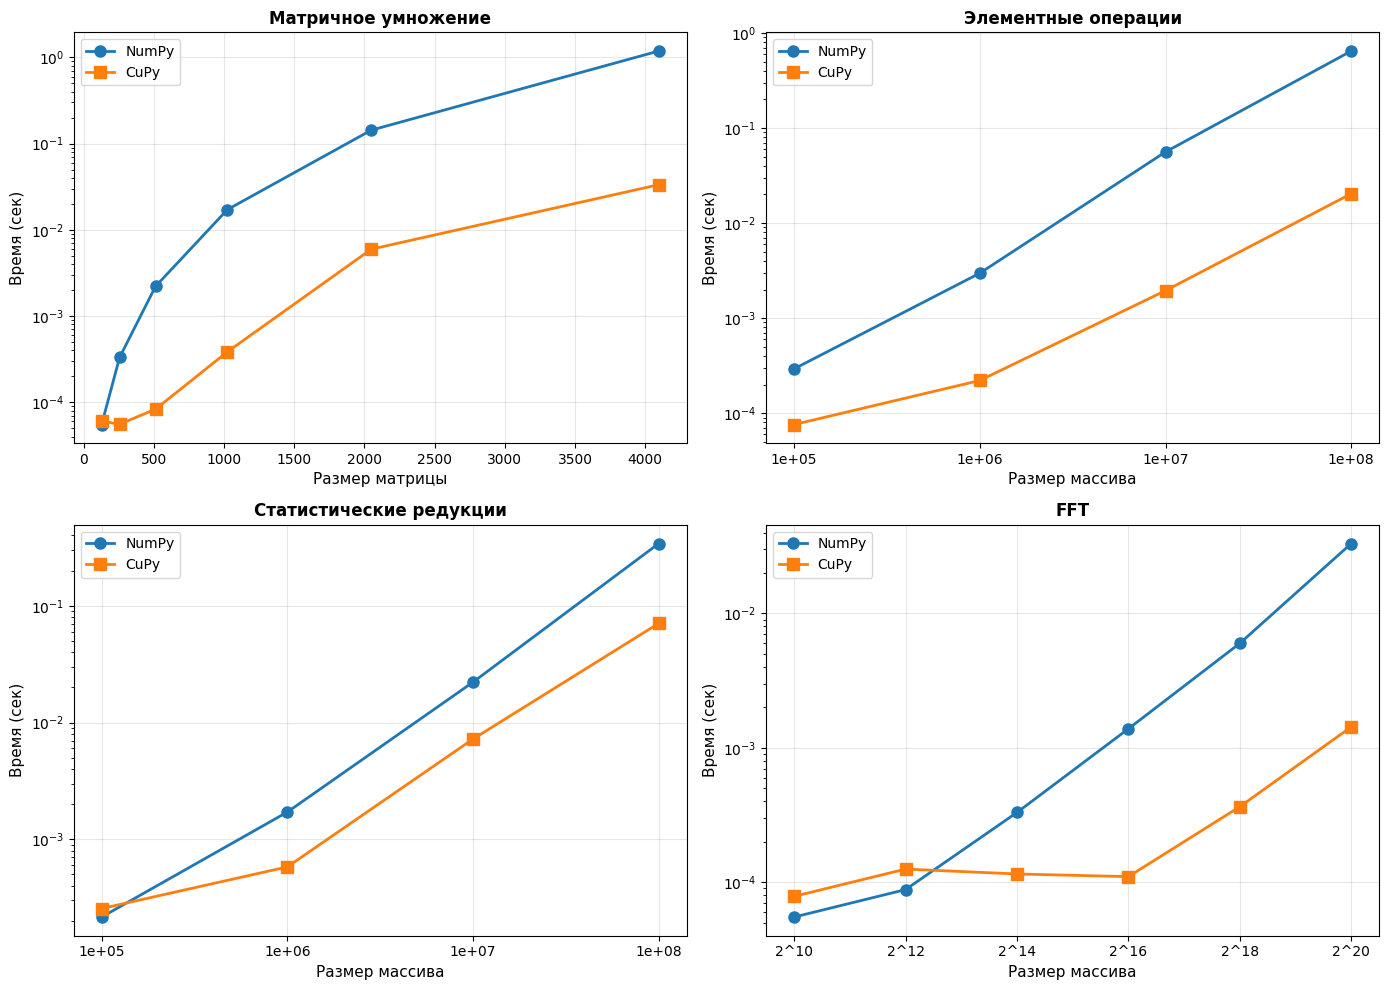

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(sizes, numpy_matmul, 'o-', label='NumPy', linewidth=2, markersize=8)
axes[0, 0].plot(sizes, cupy_matmul, 's-', label='CuPy', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Размер матрицы', fontsize=11)
axes[0, 0].set_ylabel('Время (сек)', fontsize=11)
axes[0, 0].set_title('Матричное умножение', fontsize=12, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_yscale('log')

axes[0, 1].plot([f'{s:.0e}' for s in data_sizes], numpy_elem, 'o-', label='NumPy', linewidth=2, markersize=8)
axes[0, 1].plot([f'{s:.0e}' for s in data_sizes], cupy_elem, 's-', label='CuPy', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Размер массива', fontsize=11)
axes[0, 1].set_ylabel('Время (сек)', fontsize=11)
axes[0, 1].set_title('Элементные операции', fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_yscale('log')

axes[1, 0].plot([f'{s:.0e}' for s in data_sizes], numpy_reduce, 'o-', label='NumPy', linewidth=2, markersize=8)
axes[1, 0].plot([f'{s:.0e}' for s in data_sizes], cupy_reduce, 's-', label='CuPy', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Размер массива', fontsize=11)
axes[1, 0].set_ylabel('Время (сек)', fontsize=11)
axes[1, 0].set_title('Статистические редукции', fontsize=12, fontweight='bold')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_yscale('log')

axes[1, 1].plot([f'2^{int(np.log2(s))}' for s in fft_sizes], numpy_fft, 'o-', label='NumPy', linewidth=2, markersize=8)
axes[1, 1].plot([f'2^{int(np.log2(s))}' for s in fft_sizes], cupy_fft, 's-', label='CuPy', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Размер массива', fontsize=11)
axes[1, 1].set_ylabel('Время (сек)', fontsize=11)
axes[1, 1].set_title('FFT', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

### Графики ускорения

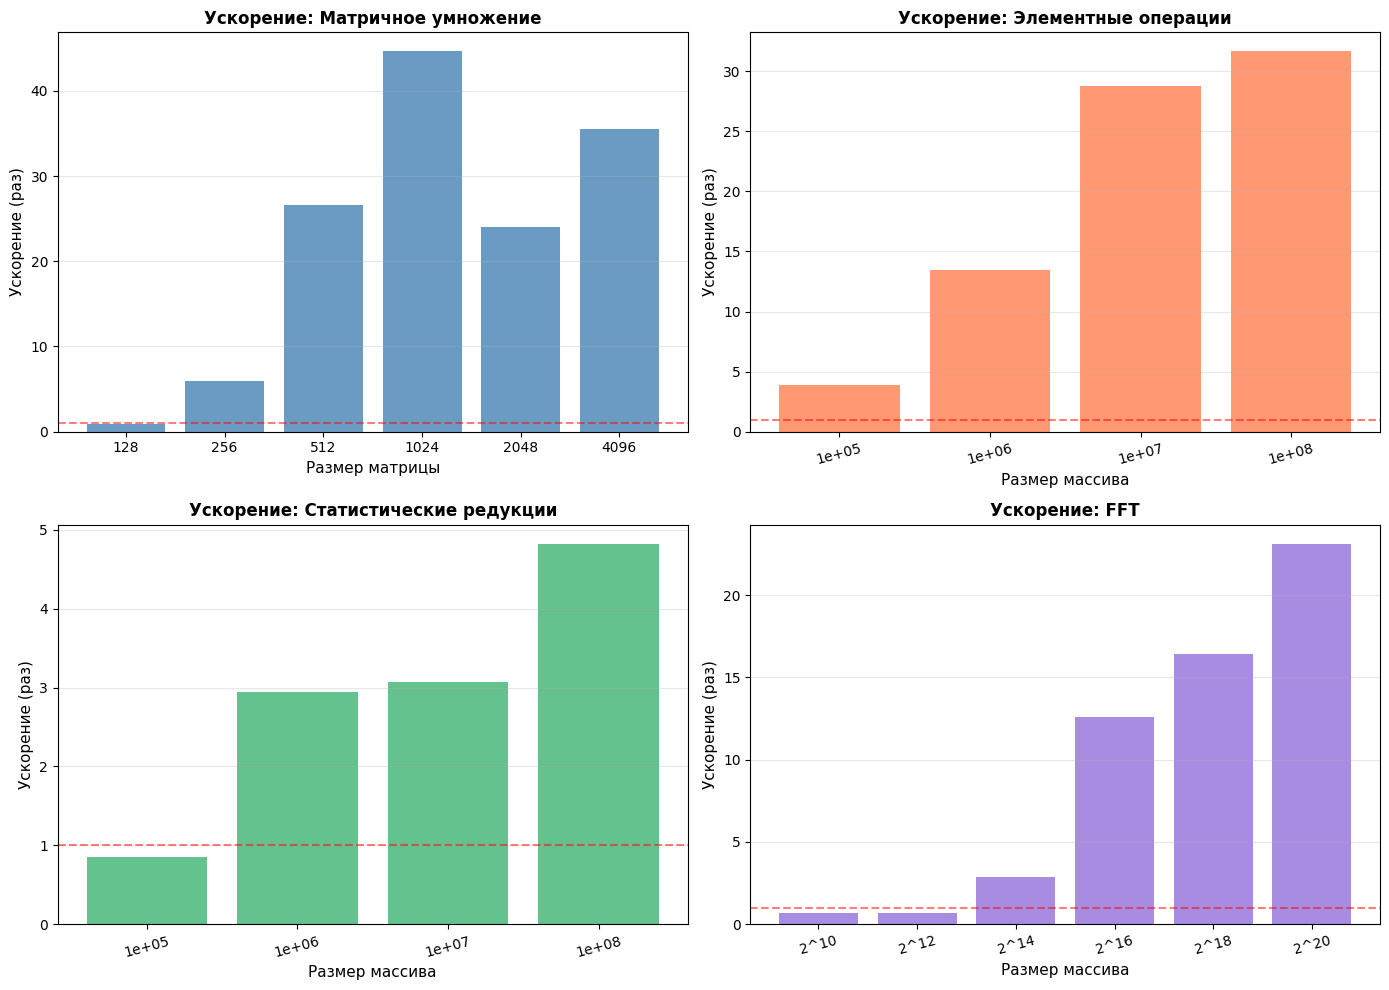

In [35]:
speedup_matmul = [n/c for n, c in zip(numpy_matmul, cupy_matmul)]
speedup_elem = [n/c for n, c in zip(numpy_elem, cupy_elem)]
speedup_reduce = [n/c for n, c in zip(numpy_reduce, cupy_reduce)]
speedup_fft = [n/c for n, c in zip(numpy_fft, cupy_fft)]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].bar(range(len(sizes)), speedup_matmul, color='steelblue', alpha=0.8)
axes[0, 0].set_xticks(range(len(sizes)))
axes[0, 0].set_xticklabels(sizes)
axes[0, 0].set_xlabel('Размер матрицы', fontsize=11)
axes[0, 0].set_ylabel('Ускорение (раз)', fontsize=11)
axes[0, 0].set_title('Ускорение: Матричное умножение', fontsize=12, fontweight='bold')
axes[0, 0].axhline(y=1, color='r', linestyle='--', alpha=0.5)
axes[0, 0].grid(True, alpha=0.3, axis='y')

axes[0, 1].bar(range(len(data_sizes)), speedup_elem, color='coral', alpha=0.8)
axes[0, 1].set_xticks(range(len(data_sizes)))
axes[0, 1].set_xticklabels([f'{s:.0e}' for s in data_sizes], rotation=15)
axes[0, 1].set_xlabel('Размер массива', fontsize=11)
axes[0, 1].set_ylabel('Ускорение (раз)', fontsize=11)
axes[0, 1].set_title('Ускорение: Элементные операции', fontsize=12, fontweight='bold')
axes[0, 1].axhline(y=1, color='r', linestyle='--', alpha=0.5)
axes[0, 1].grid(True, alpha=0.3, axis='y')

axes[1, 0].bar(range(len(data_sizes)), speedup_reduce, color='mediumseagreen', alpha=0.8)
axes[1, 0].set_xticks(range(len(data_sizes)))
axes[1, 0].set_xticklabels([f'{s:.0e}' for s in data_sizes], rotation=15)
axes[1, 0].set_xlabel('Размер массива', fontsize=11)
axes[1, 0].set_ylabel('Ускорение (раз)', fontsize=11)
axes[1, 0].set_title('Ускорение: Статистические редукции', fontsize=12, fontweight='bold')
axes[1, 0].axhline(y=1, color='r', linestyle='--', alpha=0.5)
axes[1, 0].grid(True, alpha=0.3, axis='y')

axes[1, 1].bar(range(len(fft_sizes)), speedup_fft, color='mediumpurple', alpha=0.8)
axes[1, 1].set_xticks(range(len(fft_sizes)))
axes[1, 1].set_xticklabels([f'2^{int(np.log2(s))}' for s in fft_sizes], rotation=15)
axes[1, 1].set_xlabel('Размер массива', fontsize=11)
axes[1, 1].set_ylabel('Ускорение (раз)', fontsize=11)
axes[1, 1].set_title('Ускорение: FFT', fontsize=12, fontweight='bold')
axes[1, 1].axhline(y=1, color='r', linestyle='--', alpha=0.5)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()

plt.show()

### Итоговая статистика

In [36]:
print('=== РЕЗУЛЬТАТЫ СРАВНЕНИЯ ===\n')
print(f'Матричное умножение (4096x4096): {speedup_matmul[-1]:.1f}x ускорение')
print(f'Элементные операции (10^8): {speedup_elem[-1]:.1f}x ускорение')
print(f'Статистические редукции (10^8): {speedup_reduce[-1]:.1f}x ускорение')
print(f'FFT (2^20): {speedup_fft[-1]:.1f}x ускорение')

=== РЕЗУЛЬТАТЫ СРАВНЕНИЯ ===

Матричное умножение (4096x4096): 35.5x ускорение
Элементные операции (10^8): 31.7x ускорение
Статистические редукции (10^8): 4.8x ускорение
FFT (2^20): 23.1x ускорение
